<a href="https://colab.research.google.com/github/ThuoM/Restaurant-Recommender-System/blob/pesh/restaurants_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding<br>

Check the shape, general infornation about the data sets such as data types overall number of columns and rows:

Import the necessary data manipulation and visualization libraries i.e. pandas, matloplib

In [ ]:
#download libraries

!pip install tensorflow-recommenders
!pip install --upgrade tensorflow
!pip install nltk
# !pip install scikit-surprise
!pip install tensorflow_recommenders


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import the relevant libraries

In [ ]:
import os
import pprint
import tempfile

from ast import increment_lineno
#data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import re
import string
from ast import literal_eval
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from typing import Dict, Text




from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import folium
from folium.plugins import HeatMap

import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten
from tensorflow.keras.models import Model
import tensorflow_recommenders as tfrs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



import nltk

# download nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\penina.wanyama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\penina.wanyama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\penina.wanyama\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\penina.wanyama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
sns.set_style('darkgrid')

## Load the data

In [ ]:
#create path to data
path = 'https://raw.githubusercontent.com/ThuoM/Restaurant-Recommender-System/main/'

<strong>Restaurants Data</strong>

In [ ]:
#load restaurant data
restaurants = pd.read_csv(path+'restaurant_data.csv')
#display the first 5 rows
restaurants.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,"T, h, a, i",jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,"S, z, e, c, h, u, a, n",8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,"S, h, a, n, g, h, a, i, n, e, s, e",0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,"C, o, c, k, t, a, i, l, , B, a, r, s",4DInnPhOyvXFbYpUdO0SMQ,325


<strong>Check the general information of  the restaurants dataset<strong>

In [ ]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               500 non-null    object 
 1   Rating             500 non-null    int64  
 2   Pricing            315 non-null    object 
 3   URL                500 non-null    object 
 4   Latitude           500 non-null    float64
 5   Longitude          500 non-null    float64
 6   Transactions       500 non-null    object 
 7   Location           500 non-null    object 
 8   Phone              430 non-null    float64
 9   Display Phone      430 non-null    object 
 10  Distance           500 non-null    float64
 11  Reviews            500 non-null    object 
 12  Review Count       500 non-null    int64  
 13  Cuisine            500 non-null    object 
 14  Restaurant ID      500 non-null    object 
 15  Number of Reviews  500 non-null    int64  
dtypes: float64(4), int64(3), o

We note that the data has 17 columns  and 500 rows.<br>
We have missing values in the phone,display phone and priceing.<br>

We will look further on ways to impute<br>

<strong>Display the data types of the dataset</strong>

In [ ]:
restaurants.dtypes.value_counts().to_frame()

,0
object,9
float64,4
int64,3


Most columns are of type of object, only seven are numerical

<strong>Check the statistical summary of the dataset</strong>

In [ ]:
restaurants.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,500.0,4.084000e+00,1.074828e+00,1.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
Latitude,500.0,4.072067e+01,2.411795e-02,4.066161e+01,4.070509e+01,4.072037e+01,4.073726e+01,4.078665e+01
Longitude,500.0,-7.398295e+01,2.084478e-02,-7.404418e+01,-7.399577e+01,-7.398754e+01,-7.397175e+01,-7.390008e+01
Phone,430.0,1.534016e+10,2.693333e+09,1.201793e+10,1.212787e+10,1.646476e+10,1.718584e+10,1.929990e+10
Distance,500.0,3.201060e+03,1.536452e+03,5.311971e+02,2.005497e+03,2.879159e+03,4.136861e+03,8.832813e+03
Review Count,500.0,2.982000e+00,1.724398e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
Number of Reviews,500.0,5.072520e+02,1.091866e+03,1.000000e+00,4.600000e+01,1.835000e+02,5.040000e+02,1.481600e+04


There may be outliers present as the maximum value is much larger than the mean and the standard deviation is high. However, this would require further investigation and analysis to determine whether these values are truly outliers.

<strong>Investigate presence of outliers</strong>

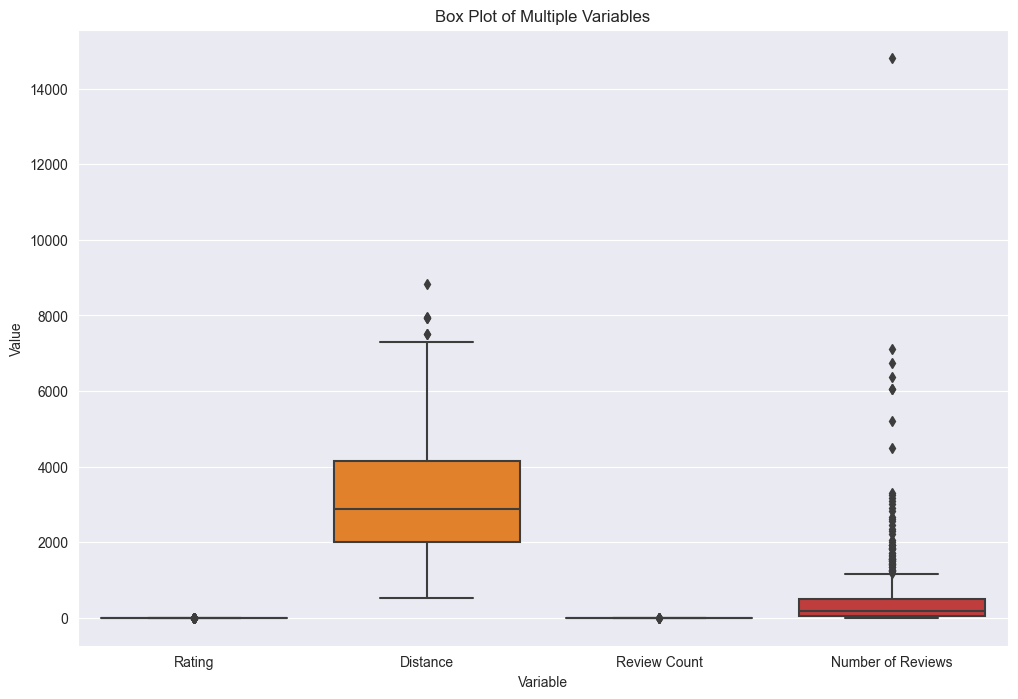

In [ ]:
# create a grouped box plot with seaborn
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=restaurants[['Rating', 'Distance', 'Review Count', 'Number of Reviews']], ax=ax)
ax.set_title('Box Plot of Multiple Variables')
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
plt.show()


Outliers are noted on Number of reviews columns, we need to investigate whether its related to the number of customers the restaurant serves or not.

<strong>Reviews Data</strong>

In [ ]:
reviews = pd.read_csv(path+'final_revs.csv')
# assign columns to the dataset
reviews.columns = ['User_Name','User_id','Location','Date_of_review','User_Rating','Comment','URL']
#display the first 5 rows
reviews.head()

,User_Name,User_id,Location,Date_of_review,User_Rating,Comment,URL
0,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
3,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
4,Brad M.,/user_details?userid=IMD57wrCtAPbvBSAlI2nkA,"Princeton, NJ",1/10/2023,5.0,Great venue. The various vendors have amazing ...,https://www.yelp.com/biz/urbanspace-union-squa...


<strong>Check the general information of  the reviews dataset<strong>

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188714 entries, 0 to 188713
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_Name       188714 non-null  object 
 1   User_id         188714 non-null  object 
 2   Location        188714 non-null  object 
 3   Date_of_review  188714 non-null  object 
 4   User_Rating     188714 non-null  float64
 5   Comment         188714 non-null  object 
 6   URL             188714 non-null  object 
dtypes: float64(1), object(6)
memory usage: 10.1+ MB


we do not have missing values in our dataset.<br>
We have 188,714 rows and 7 columns<br>
we have 6 object datatypes with 1 float

<strong>Display statistical summary</strong>

In [ ]:
reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_Rating,188714.0,4.175753,1.132427,1.0,4.0,5.0,5.0,5.0


The User_Rating variable has a mean of 4.175753 and a standard deviation of 1.132427, indicating that the ratings in the sample vary somewhat from the mean. Most of the ratings (75%) are 5.0 or lower, with a median of 5.0. The minimum rating in the sample is 1.0, while the maximum rating is 5.0.

<strong>Inspect the presnce of outliers</strong>

In [ ]:
#check for outliers in user_rating columnu sing the interquatile range calculation
Q1, Q3 = np.percentile(reviews['User_Rating'], [25,75]) 
IQR = Q3-Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 2.5
up_limit is 6.5


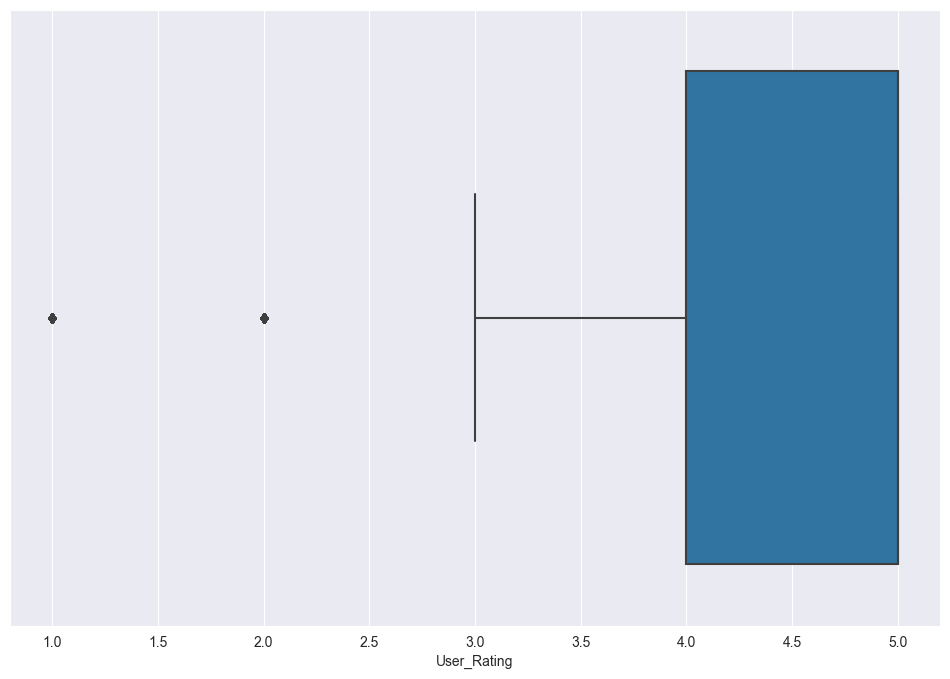

In [ ]:
#boxplot for User_rating column
plt.figure(figsize=(12,8))
sns.boxplot(x = reviews['User_Rating']);

There is minimal outliers on the lower side of the interquatile range fence

## Data Preparation<br>
check and handle missing values and duplicates in the two datasets:
* restuarants
* reviews



<strong>restuarants dataset</strong>


In [ ]:
restaurants.isna().sum()

Name                   0
Rating                 0
Pricing              185
URL                    0
Latitude               0
Longitude              0
Transactions           0
Location               0
Phone                 70
Display Phone         70
Distance               0
Reviews                0
Review Count           0
Cuisine                0
Restaurant ID          0
Number of Reviews      0
dtype: int64

We have 173 missing values in the dataset for the pricing column. Lets do a value_counts on the pricing column to see the unique values

In [ ]:
restaurants['Pricing'].value_counts().to_frame()

,Pricing
$$,215
$$$,56
$,28
$$$$,16


We note that most restaurants have a $$ pricing. We just go ahead and replace the missing values with the mode(since its the datatype is of type string). This is because price is of products within a certain locality seem to be more or less similar most of the time.

In [ ]:
# Calculate the mode of the column
mode = restaurants['Pricing'].mode()[0]

# Replace missing values with mode
restaurants['Pricing'].fillna(mode, inplace=True)

In [ ]:
#confirm that there are no missing values in the pricing column 
restaurants.isna().sum()

Name                  0
Rating                0
Pricing               0
URL                   0
Latitude              0
Longitude             0
Transactions          0
Location              0
Phone                70
Display Phone        70
Distance              0
Reviews               0
Review Count          0
Cuisine               0
Restaurant ID         0
Number of Reviews     0
dtype: int64

Since we cannot guess a phone number, lets replace the missing values with "Missing"


In [ ]:
# Replace missing values with in Display phone with "missing"
restaurants['Display Phone'].fillna('missing', inplace=True)

In [ ]:
#confirm that there are no missing values in the display phone column 
restaurants.isna().sum()

Name                  0
Rating                0
Pricing               0
URL                   0
Latitude              0
Longitude             0
Transactions          0
Location              0
Phone                70
Display Phone         0
Distance              0
Reviews               0
Review Count          0
Cuisine               0
Restaurant ID         0
Number of Reviews     0
dtype: int64

In [ ]:
# Replace missing values with "missing"
restaurants['Phone'].fillna('missing', inplace=True)

<strong>Check for duplicates</strong>

In [ ]:
restaurants.duplicated().value_counts()

False    441
True      59
dtype: int64

We have 45 duplicate entries. we will drop them

In [ ]:
restaurants.drop_duplicates(inplace=True)

In [ ]:
#confirm that there are no missing values in the display phone column 
restaurants.isna().sum()

Name                 0
Rating               0
Pricing              0
URL                  0
Latitude             0
Longitude            0
Transactions         0
Location             0
Phone                0
Display Phone        0
Distance             0
Reviews              0
Review Count         0
Cuisine              0
Restaurant ID        0
Number of Reviews    0
dtype: int64

<strong>reviews dataset</strong>

In [ ]:
#check for missing values
reviews.isna().sum()

User_Name         0
User_id           0
Location          0
Date_of_review    0
User_Rating       0
Comment           0
URL               0
dtype: int64

There are no missing values in the  reviews dataset

<strong>Check for duplicates</strong>

In [ ]:
reviews.duplicated().sum()

61476

we have 61476 duplicates. we will drop them

In [ ]:
reviews.drop_duplicates(inplace=True)

### Dataset Merging

To get the restauarants' personalized reviews and ratings, we have to merge our reviews and the restaurant datasets

In [ ]:
#create a new dataset of merged datasets
restaurant_reviews = restaurants.merge(reviews, on='URL')

In [ ]:
#display first 5 restaurants 
restaurant_reviews.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location_x,Phone,Display Phone,...,Review Count,Cuisine,Restaurant ID,Number of Reviews,User_Name,User_id,Location_y,Date_of_review,User_Rating,Comment
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",12123671979.0,(212) 367-1979,...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Veronika N.,/user_details?userid=MSg_3-fj-ci1E13Kx8626Q,"New York, NY",3/3/2023,3.0,This small and crowded place seems to be a nei...
1,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",12123671979.0,(212) 367-1979,...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Shiraz D.,/user_details?userid=nnmfrjtA7k16dpn_WY1ceg,"Tenafly, NJ",3/4/2023,5.0,Amazing pasta!! Literally cleaned our plates. ...
2,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",12123671979.0,(212) 367-1979,...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Ke W.,/user_details?userid=CLCYWYIRJfYqwS8puiczFA,"Monterey Park, CA",2/18/2023,4.0,Great food! (I just type these words to reach ...
3,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",12123671979.0,(212) 367-1979,...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Evelyn C.,/user_details?userid=c-pnORQO-uUnab-j4clObw,"San Francisco, CA",4/3/2023,5.0,No comment
4,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",12123671979.0,(212) 367-1979,...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Fred S.,/user_details?userid=tzUTM7ZN6yowhxcszXfcJg,"Carlsbad, San Diego, CA",4/1/2023,4.0,No comment


We note tahat we have two columns with the name rating. Lets convert the rating column to avg rating

In [ ]:
restaurant_reviews.rename(columns={'Rating': 'avg rating'}, inplace=True)

In [ ]:
#confirm the renaming
restaurant_reviews.columns

Index(['Name', 'avg rating', 'Pricing', 'URL', 'Latitude', 'Longitude',
       'Transactions', 'Location_x', 'Phone', 'Display Phone', 'Distance',
       'Reviews', 'Review Count', 'Cuisine', 'Restaurant ID',
       'Number of Reviews', 'User_Name', 'User_id', 'Location_y',
       'Date_of_review', 'User_Rating', 'Comment'],
      dtype='object')

We have two columns with location data. We will drop one.(location_x), Our recommender system will also be based on features such as user_rating, restaurant id, comments, cuisine, price. We will go ahead and drop the columns that will not influence much in our recommender system

In [ ]:
#make a copy of the restaurant_reviews
filttered_restaurant_reviews = restaurant_reviews.copy()
filttered_restaurant_reviews.sample(2)
#drop unnecessary columns
filttered_restaurant_reviews = filttered_restaurant_reviews.drop(['Location_x','Phone', 'Display Phone','Distance','Reviews', 'Review Count'], axis=1)

In [ ]:
#check the columns
filttered_restaurant_reviews.columns

Index(['Name', 'avg rating', 'Pricing', 'URL', 'Latitude', 'Longitude',
       'Transactions', 'Cuisine', 'Restaurant ID', 'Number of Reviews',
       'User_Name', 'User_id', 'Location_y', 'Date_of_review', 'User_Rating',
       'Comment'],
      dtype='object')

Lets rename columns for uniformity

In [ ]:
filttered_restaurant_reviews.rename(columns={'Name':'restaurant_name','avg rating':'avg_rating','Restaurant ID':'restaurant_id','Number of Reviews':'number_of_reviews', 'Location_y':'location', 'Comment':'comments'}, inplace=True)

In [ ]:
filttered_restaurant_reviews.head()

,restaurant_name,avg_rating,Pricing,URL,Latitude,Longitude,Transactions,Cuisine,restaurant_id,number_of_reviews,User_Name,User_id,location,Date_of_review,User_Rating,comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Veronika N.,/user_details?userid=MSg_3-fj-ci1E13Kx8626Q,"New York, NY",3/3/2023,3.0,This small and crowded place seems to be a nei...
1,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Shiraz D.,/user_details?userid=nnmfrjtA7k16dpn_WY1ceg,"Tenafly, NJ",3/4/2023,5.0,Amazing pasta!! Literally cleaned our plates. ...
2,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Ke W.,/user_details?userid=CLCYWYIRJfYqwS8puiczFA,"Monterey Park, CA",2/18/2023,4.0,Great food! (I just type these words to reach ...
3,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Evelyn C.,/user_details?userid=c-pnORQO-uUnab-j4clObw,"San Francisco, CA",4/3/2023,5.0,No comment
4,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Fred S.,/user_details?userid=tzUTM7ZN6yowhxcszXfcJg,"Carlsbad, San Diego, CA",4/1/2023,4.0,No comment


In [ ]:
filttered_restaurant_reviews.columns = map(str.lower, filttered_restaurant_reviews.columns)
filttered_restaurant_reviews.head()

,restaurant_name,avg_rating,pricing,url,latitude,longitude,transactions,cuisine,restaurant_id,number_of_reviews,user_name,user_id,location,date_of_review,user_rating,comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Veronika N.,/user_details?userid=MSg_3-fj-ci1E13Kx8626Q,"New York, NY",3/3/2023,3.0,This small and crowded place seems to be a nei...
1,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Shiraz D.,/user_details?userid=nnmfrjtA7k16dpn_WY1ceg,"Tenafly, NJ",3/4/2023,5.0,Amazing pasta!! Literally cleaned our plates. ...
2,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Ke W.,/user_details?userid=CLCYWYIRJfYqwS8puiczFA,"Monterey Park, CA",2/18/2023,4.0,Great food! (I just type these words to reach ...
3,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Evelyn C.,/user_details?userid=c-pnORQO-uUnab-j4clObw,"San Francisco, CA",4/3/2023,5.0,No comment
4,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']","I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851,Fred S.,/user_details?userid=tzUTM7ZN6yowhxcszXfcJg,"Carlsbad, San Diego, CA",4/1/2023,4.0,No comment


<strong>Check the shape of the merged dataset</strong>

In [ ]:
filttered_restaurant_reviews.shape

(113688, 16)

We have 1113688 rows and 16 columns.

<strong>Lets check for missing values</strong>

In [ ]:
filttered_restaurant_reviews.isna().sum()

restaurant_name      0
avg_rating           0
pricing              0
url                  0
latitude             0
longitude            0
transactions         0
cuisine              0
restaurant_id        0
number_of_reviews    0
user_name            0
user_id              0
location             0
date_of_review       0
user_rating          0
comments             0
dtype: int64

We do not have missing values.

Check for anomalies in the dataset.


In [ ]:
for column in filttered_restaurant_reviews.select_dtypes(include=['object']):
  print("===============")
  print(f"Value counts for column '{column}':\n{filttered_restaurant_reviews[column].value_counts(normalize=True)}\n")


Value counts for column 'restaurant_name':
Joe's Shanghai                            0.057983
Peter Luger                               0.040884
Jacob's Pickles                           0.031569
ABC Kitchen                               0.027751
Vanessa's Dumpling House                  0.024708
                                            ...   
Panzón                                    0.000035
Keg & Lantern Brewing Company             0.000018
Pierre Loti Mediterranean Kitchen& Bar    0.000018
Ro’s Diner                                0.000009
Itaewon Pocha                             0.000009
Name: restaurant_name, Length: 293, dtype: float64

Value counts for column 'pricing':
$$      0.705659
$$$     0.137816
$       0.100530
$$$$    0.055995
Name: pricing, dtype: float64

Value counts for column 'url':
https://www.yelp.com/biz/joes-shanghai-new-york-2?adjust_creative=YOPxpPg1qGggP5qGSctmew&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=YOPxpPg1qGggP5qGSctm

Words in the cuisine and transactions columns are not human readable. Lets preprocess them

In [ ]:
# Converting the cuisine text to a more human readable format
filttered_restaurant_reviews['cuisine'] = filttered_restaurant_reviews['cuisine'].map(lambda x: x.replace(',',''))
filttered_restaurant_reviews['cuisine'] = filttered_restaurant_reviews['cuisine'].apply(lambda x: x.replace(" ", ""))
set(filttered_restaurant_reviews['cuisine'])

{'American(New)',
 'American(Traditional)',
 'Argentine',
 'AsianFusion',
 'Australian',
 'Austrian',
 'Bagels',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Belgian',
 'Breakfast&Brunch',
 'BubbleTea',
 'Buffets',
 'Burgers',
 'Burmese',
 'Cafes',
 'Cajun/Creole',
 'Cantonese',
 'Caribbean',
 'ChickenShop',
 'ChickenWings',
 'Chinese',
 'CocktailBars',
 'Coffee&Tea',
 'ComfortFood',
 'Cuban',
 'Delis',
 'Desserts',
 'DimSum',
 'Diners',
 'FastFood',
 'Filipino',
 'FoodCourt',
 'French',
 'Gastropubs',
 'Georgian',
 'German',
 'Greek',
 'Grocery',
 'Indian',
 'Indonesian',
 'Italian',
 'Izakaya',
 'Japanese',
 'JapaneseCurry',
 'Korean',
 'LatinAmerican',
 'Lebanese',
 'Lounges',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'MiddleEastern',
 'ModernEuropean',
 'NewMexicanCuisine',
 'PanAsian',
 'Patisserie/CakeShop',
 'Persian/Iranian',
 'Peruvian',
 'Pizza',
 'Portuguese',
 'Pubs',
 'Ramen',
 'Sandwiches',
 'Scandinavian',
 'Seafood',
 'Shanghainese',
 'SoulFood',
 'Southern',
 'Spanish',
 'S

<strong>Process the location to just remain with the location name without the location</strong>

In [ ]:
# Need to work on locations
filttered_restaurant_reviews['location'] = filttered_restaurant_reviews['location'].str.split(',').str[-2].str.strip(string.punctuation)

# adjusting the new york ward to be represented better
filttered_restaurant_reviews.loc[filttered_restaurant_reviews.location == 'new york', 'location'] = ' new york'


filttered_restaurant_reviews.head()

,restaurant_name,avg_rating,pricing,url,latitude,longitude,transactions,cuisine,restaurant_id,number_of_reviews,user_name,user_id,location,date_of_review,user_rating,comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Veronika N.,/user_details?userid=MSg_3-fj-ci1E13Kx8626Q,New York,3/3/2023,3.0,This small and crowded place seems to be a nei...
1,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Shiraz D.,/user_details?userid=nnmfrjtA7k16dpn_WY1ceg,Tenafly,3/4/2023,5.0,Amazing pasta!! Literally cleaned our plates. ...
2,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Ke W.,/user_details?userid=CLCYWYIRJfYqwS8puiczFA,Monterey Park,2/18/2023,4.0,Great food! (I just type these words to reach ...
3,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Evelyn C.,/user_details?userid=c-pnORQO-uUnab-j4clObw,San Francisco,4/3/2023,5.0,No comment
4,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"['delivery', 'pickup', 'restaurant_reservation']",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Fred S.,/user_details?userid=tzUTM7ZN6yowhxcszXfcJg,San Diego,4/1/2023,4.0,No comment


<strong>Replace empty transactions with NA and remove the square brackets</strong>

In [ ]:
#inspect
filttered_restaurant_reviews['transactions'] = filttered_restaurant_reviews['transactions'].appy(lambda x: ''.join(x))

['delivery', 'pickup']                              51801
['pickup', 'delivery']                              27276
['delivery']                                        15007
[]                                                  10628
['delivery', 'pickup', 'restaurant_reservation']     3458
['pickup', 'delivery', 'restaurant_reservation']     2378
['pickup', 'restaurant_reservation', 'delivery']     1730
['restaurant_reservation', 'delivery', 'pickup']      815
['restaurant_reservation', 'delivery']                331
['restaurant_reservation']                            264
Name: transactions, dtype: int64

In [ ]:
filttered_restaurant_reviews['transactions'].replace("[]", pd.NA, inplace=True)
print(filttered_restaurant_reviews.shape)
print( "cleaned transactions before dropping Null values", filttered_restaurant_reviews['transactions'])
filttered_restaurant_reviews.dropna(inplace=True)
print("shape after dropping null values", filttered_restaurant_reviews.shape)

(102980, 20)
cleaned transactions before dropping Null values 0          
1          
2          
3          
4          
         ..
113621     
113622     
113623     
113624     
113625     
Name: transactions, Length: 102980, dtype: object
shape after dropping null values (102980, 20)


In [ ]:
filttered_restaurant_reviews['transactions'] = filttered_restaurant_reviews['transactions'].apply(lambda x: ''.join(x))
filttered_restaurant_reviews['transactions']

0          
1          
2          
3          
4          
         ..
113621     
113622     
113623     
113624     
113625     
Name: transactions, Length: 102980, dtype: object

## Exploratory Data Analysis<br>

Here we will look at univariate, bivariate and multivariate data analysis using visualizations.


Univariate

In [ ]:
filttered_restaurant_reviews.sample(5)

,restaurant_name,avg_rating,pricing,url,latitude,longitude,transactions,cuisine,restaurant_id,number_of_reviews,user_name,user_id,location,date_of_review,user_rating,comments
89485,Katsu-Hama,5,$$,https://www.yelp.com/biz/katsu-hama-new-york?a...,40.756380,-73.977590,"[,',p,i,c,k,u,p,',,, ,',d,e,l,i,v,e,r,y,',,, ,...",Japanese,-J8VuX3wGrYSOBu2G0hMsw,1562,Jeffery R.,/user_details?userid=FYYJW_Cbfmq-_HOw5lqaVQ,New York,1/5/2015,4.0,Dont come for the ambiance (loud pumpin' gym-m...
33423,Coppelia,1,$$,https://www.yelp.com/biz/coppelia-new-york?adj...,40.738911,-73.999999,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",Cuban,vgg1dvDP-9tFWSacN4q0nA,1517,Diane B.,/user_details?userid=RSUJ9aIIz20b4jwhocyTsQ,BAYSIDE,11/5/2013,4.0,No comment
42574,Izakaya Juraku,3,$$$,https://www.yelp.com/biz/izakaya-juraku-new-yo...,40.719680,-73.988709,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",Bars,RYKGs45OjF-vlb2Ds2Jb_g,191,Jonathan L.,/user_details?userid=QVVPFxGRs231Hu-Np37muQ,Las Vegas,1/30/2023,5.0,Love the food and great skewers
1268,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Ben W.,/user_details?userid=MpRMV1IlT8jzfLdI0fGr1w,New York,7/12/2012,5.0,No comment
71200,Manousheh - Bleecker,4,$,https://www.yelp.com/biz/manousheh-bleecker-ne...,40.729511,-74.001275,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",Lebanese,VSPkVw9gSQx-5v4A6aC_YA,507,Charley K.,/user_details?userid=ZeXaLOPR5S4BXoMU9phTOw,New York,3/11/2018,4.0,Looking for some excellent Lebanese food in th...


<strong>Check the distribution of ratings</strong>

We will first do a value_counts to check fo unique values and any anomalies in the column

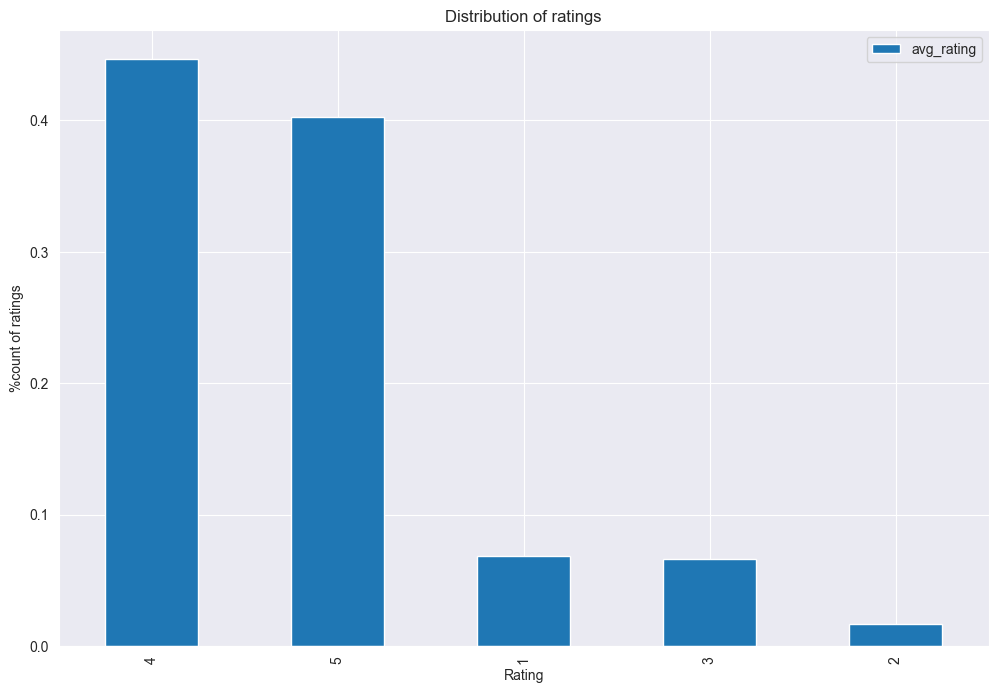

In [ ]:
filttered_restaurant_reviews['avg_rating'].value_counts(normalize=True).to_frame().plot(kind='bar', figsize=(12, 8))
plt.title("Distribution of ratings")
plt.xlabel('Rating')
plt.ylabel('%count of ratings');

Most restaurants have a rating of 5, 4 and 3. very few have a rating of 2 and one repectively

<strong>Distribution of food prices</strong>

In [ ]:
filttered_restaurant_reviews['pricing'].value_counts(normalize=True).to_frame()

,pricing
$$,0.740590
$$$,0.141338
$,0.106419
$$$$,0.011653


we note that our prices are represent by the money sign($). We will change this to below format.
* Mid-range (3 signs)
* Cheap Eats (1 sign)
* Affordable (2 signs)
* Pricey Dining (4 signs)

In [ ]:
filttered_restaurant_reviews['pricing'].replace(['$$', '$$$$', '$', '$$$'], ['low', 'pricey-dining', 'popular-eats', 'mid-range'], inplace=True)

In [ ]:
#confirm the changes
filttered_restaurant_reviews['pricing'].value_counts(normalize=True).to_frame()

,pricing
low,0.740590
mid-range,0.141338
popular-eats,0.106419
pricey-dining,0.011653


<strong>Plot a bar to show the price distribution</strong>

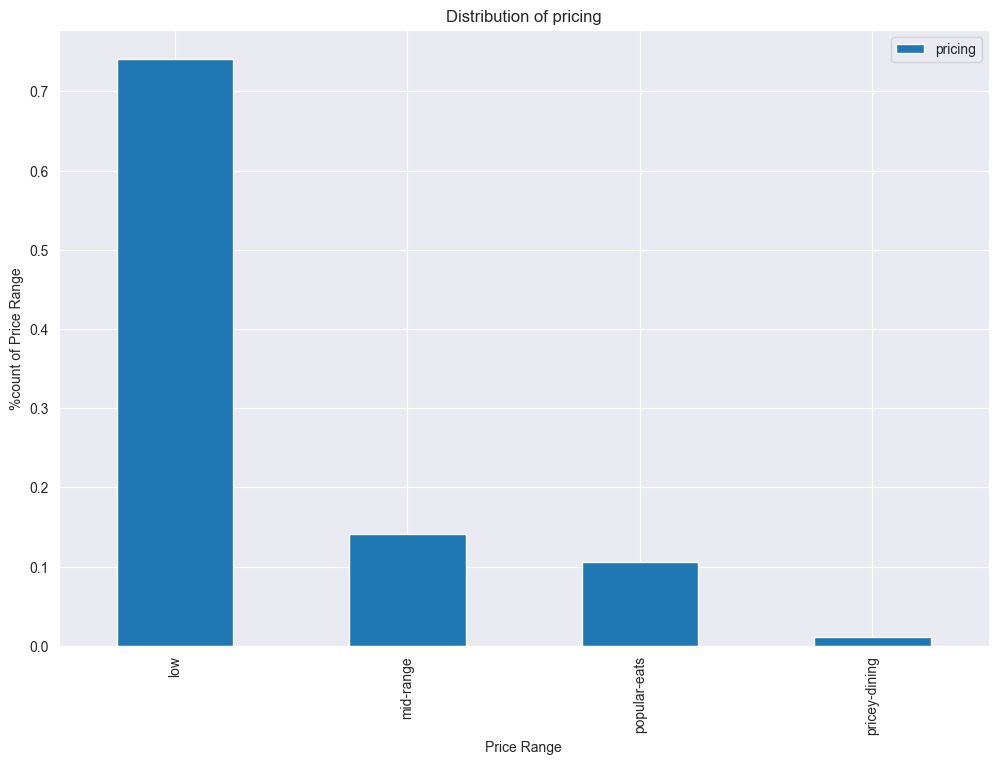

In [ ]:
filttered_restaurant_reviews['pricing'].value_counts(normalize=True).to_frame().plot(kind='bar', figsize=(12, 8))
plt.title("Distribution of pricing")
plt.xlabel('Price Range')
plt.ylabel('%count of Price Range');

Most Restaurants in the dataset have low prices

<strong>Plot the trend in review generation</strong>

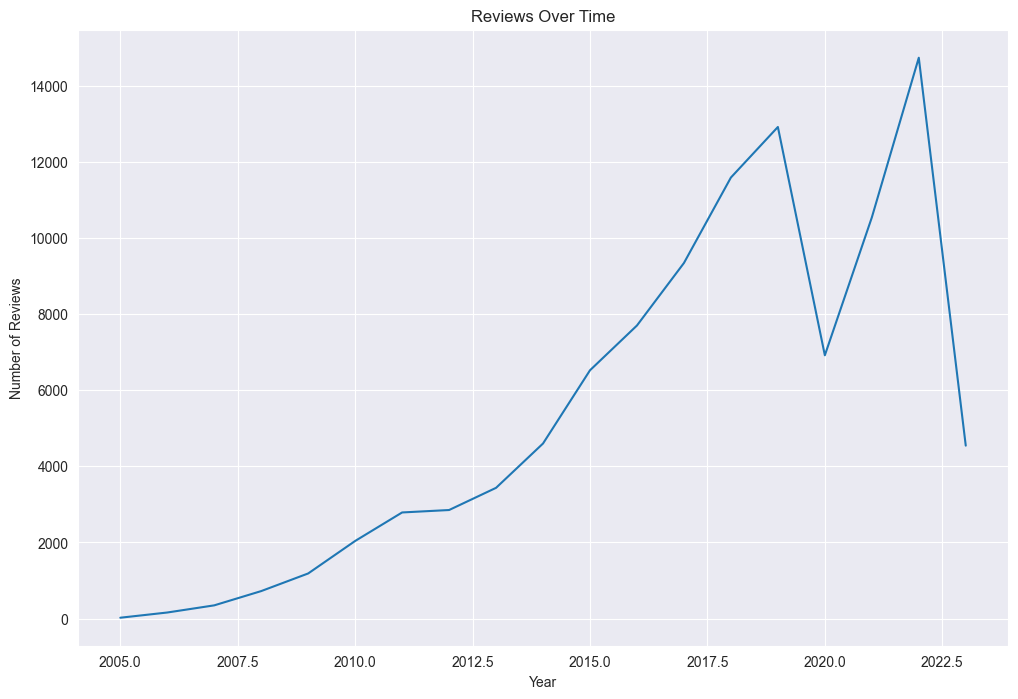

In [ ]:
#create a copy of the restaurant_reviews 
restaurant_reviews_copy = filttered_restaurant_reviews.copy()
#get the year from the date string
restaurant_reviews_copy['date_of_review'] = pd.to_datetime(restaurant_reviews_copy['date_of_review']).dt.year
#group the reviews by year and calculate the mean value for each year
grouped_reviews = restaurant_reviews_copy.groupby(restaurant_reviews_copy['date_of_review'])['number_of_reviews'].count()
# plot the "reviews" column as a time series
#set the size of the graph
plt.figure(figsize=(12,8))
plt.plot(grouped_reviews.index, grouped_reviews.values)
# plt.plot(grouped_reviews.index, grouped_reviews.values)

# customize the plot with axis labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Reviews Over Time')
# show the plot
plt.show()


<p>From 2005 to 2019, restaurant reviews displayed a consistent upward trend. However, in 2020, there was a significant drop followed by a sharp increase in 2021 and subsequent drop again in 2022. An investigation is required to determine the underlying reasons for this pattern.Factors such as covid-19 that led to lockdowns may have made it difficult for people to visit restaurants due to social distancing.</p>

<p>In 2021, the higher reviews could be due to a combination of factors. For example, as vaccination rates increased and restrictions were lifted, more people may have felt comfortable dining out again, resulting in an increase in the number of restaurant-goers and, consequently, more ratings. Additionally, some restaurants may have adapted to the new normal and implemented safety protocols and innovative ways to provide a better dining experience for their customers, leading to higher number of reviews.</p>

<strong>Distribution of rating in relation to price range</strong>

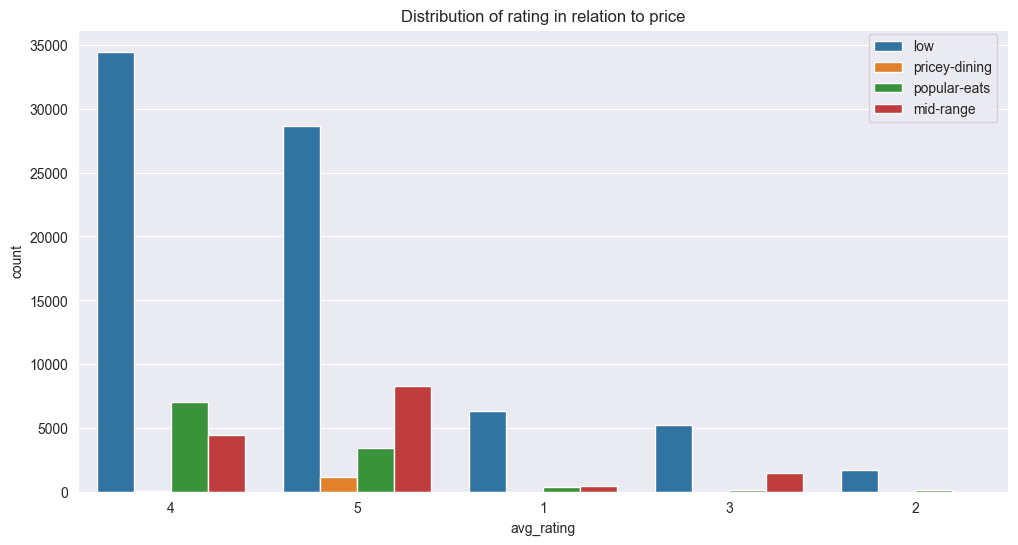

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=restaurant_reviews_copy, x='avg_rating', hue='pricing',  order = restaurant_reviews_copy['avg_rating'].value_counts().index)
plt.title("Distribution of rating in relation to price")
plt.legend(loc=(0.85,0.8));

Low priced restaurants have higher rating compared to mid-range and highly priced ones

<strong>Top 10 Most reviewed restaurants</strong>

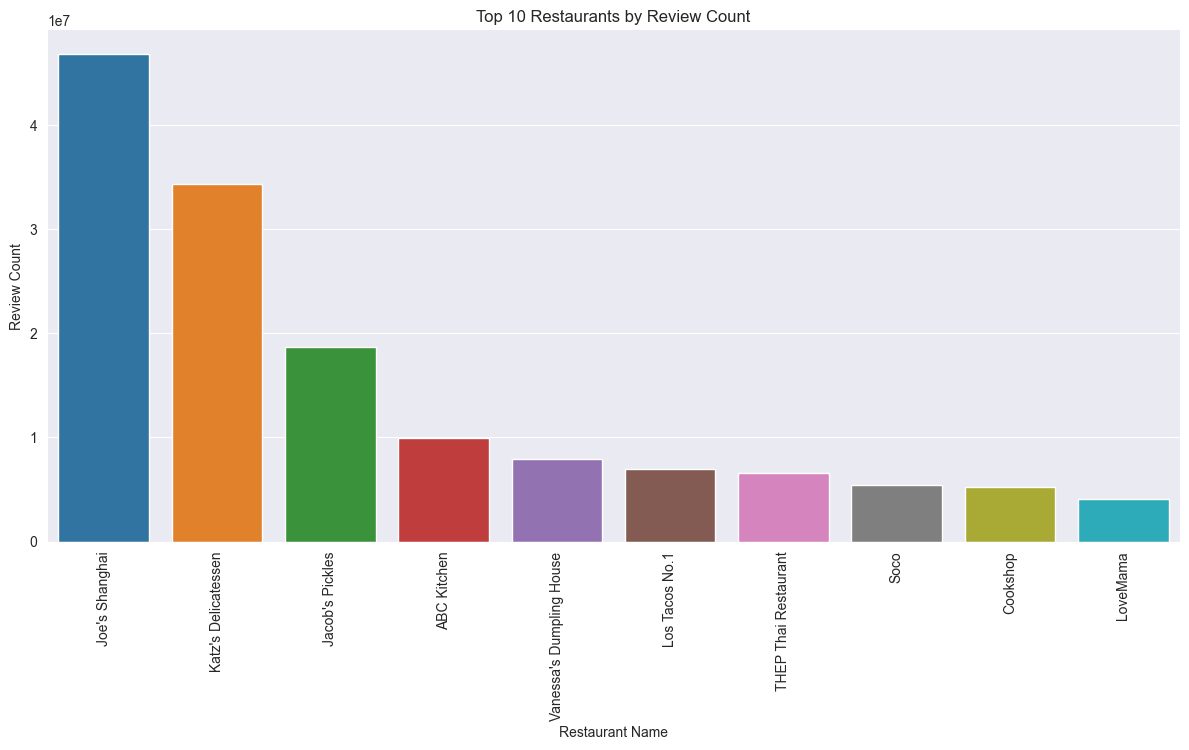

In [ ]:
# Get the top 10 restaurants by review count
review_count = filttered_restaurant_reviews.groupby(['restaurant_name']).sum(numeric_only=True)['number_of_reviews'].nlargest(10)

# Create a new DataFrame with the names and counts of the top 10 restaurants
top10_restaurants = pd.DataFrame({'Restaurant Name': review_count.index, 'Review Count': review_count.values})

# Create a count plot of the top 10 restaurants by review count
sns.catplot(x='Restaurant Name', y='Review Count', kind='bar', data=top10_restaurants, height=6, aspect=2)
plt.title('Top 10 Restaurants by Review Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Review Count')
plt.xticks(rotation=90)
plt.show()


Peter Luger seems to have the highest number of reviews compared to any other restaurants

<strong>Map:</strong>

In [ ]:
# Replace None with appropriate code

# Import the library
import folium

# Set up center latitude and longitude
center_lat = filttered_restaurant_reviews['latitude'].mean()
center_long = filttered_restaurant_reviews['longitude'].mean()

# Initialize map with center lat and long
yelp_map = folium.Map(location=[center_lat,center_long], zoom_start=13)

# Adjust this limit to see more or fewer businesses
limit=2000

for index, business in filttered_restaurant_reviews[:limit].iterrows():
    # Extract information about business
    lat = business['latitude']
    long = business['longitude']
    name = business['restaurant_name']
    rating = business['avg_rating']
    price = business['pricing']
    cuisine = business['cuisine']
    details = "{}\nPrice: {} Rating:{}".format(name,price,rating)
    
    # Create popup with relevant details
    popup = details
    
    # Create marker with relevant lat/long and popup
    marker = folium.Marker([lat, long], popup=popup)
    
    marker.add_to(yelp_map)
    
yelp_map


<strong>Preprocessing text columns</strong><br>
Text data is usually very messy. This especially applies in a context like twitter where there a lot of variations to how people express themselves.<br>

Cleaning this data is a first step. Getting rid of unnecessary data will aid in retaining the most relevant parts of the data that can then be used for the next step.We use NLTK word Lemmatizer and also remove English stop words and non alphabet tokens from reviews and style attributes.

<strong>comments</strong>

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        # only verbs
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        
        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [ ]:
filttered_restaurant_reviews['comments'].apply(process_sentences)

0         This small crowded place seem neighborhood fav...
1         Amazing pasta Literally clean plate Would defi...
2         Great food I type word reach character What No...
3                                                No comment
4                                                No comment
                                ...                        
113621    They say soft taco tortilla gluten free make s...
113622    I carne asada burrito salty flavor You add man...
113623    My friend I come Luchadores week Their burrito...
113624    I use love place upon bring mother visit DC tr...
113625    Ordered delivery yum Just I need really feel l...
Name: comments, Length: 102980, dtype: object

<strong>cuisine</strong>

In [ ]:
filttered_restaurant_reviews['cuisine'].apply(process_sentences)

0         Italian
1         Italian
2         Italian
3         Italian
4         Italian
           ...   
113621    Mexican
113622    Mexican
113623    Mexican
113624    Mexican
113625    Mexican
Name: cuisine, Length: 102980, dtype: object

In [ ]:
filttered_restaurant_reviews.head()

,restaurant_name,avg_rating,pricing,url,latitude,longitude,transactions,cuisine,restaurant_id,number_of_reviews,user_name,user_id,location,date_of_review,user_rating,comments
0,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Veronika N.,/user_details?userid=MSg_3-fj-ci1E13Kx8626Q,New York,3/3/2023,3.0,This small and crowded place seems to be a nei...
1,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Shiraz D.,/user_details?userid=nnmfrjtA7k16dpn_WY1ceg,Tenafly,3/4/2023,5.0,Amazing pasta!! Literally cleaned our plates. ...
2,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Ke W.,/user_details?userid=CLCYWYIRJfYqwS8puiczFA,Monterey Park,2/18/2023,4.0,Great food! (I just type these words to reach ...
3,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Evelyn C.,/user_details?userid=c-pnORQO-uUnab-j4clObw,San Francisco,4/3/2023,5.0,No comment
4,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Fred S.,/user_details?userid=tzUTM7ZN6yowhxcszXfcJg,San Diego,4/1/2023,4.0,No comment


<strong>Create a Bag-of-words(BoW)</strong><br>

combines all the words in a document into a single "bag" and then calculates the frequency of each word in the bag. This frequency information can then be used to represent the document as a vector of word frequencies.
Here we will combine three columns: comments, cuisines, transactions to create our bog

In [ ]:
filttered_restaurant_reviews['bogs'] = filttered_restaurant_reviews['cuisine'] + ' ' + filttered_restaurant_reviews['comments'] + ' ' + filttered_restaurant_reviews['transactions']
filttered_restaurant_reviews[['comments', 'cuisine', 'transactions','bogs']].sample(5)

,comments,cuisine,transactions,bogs
72911,"Typical Korean bar food, but pretty good food....",Korean,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]","Korean Typical Korean bar food, but pretty goo..."
96368,Really delicious and well presented Thai food ...,Thai,"[,',p,i,c,k,u,p,',,, ,',d,e,l,i,v,e,r,y,',]",Thai Really delicious and well presented Thai ...
103226,"Loved this place! Their service is awesome, ev...",American(New),"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",American(New) Loved this place! Their service ...
86080,No comment,Cafes,"[,',p,i,c,k,u,p,',,, ,',d,e,l,i,v,e,r,y,',]","Cafes No comment [,',p,i,c,k,u,p,',,, ,',d,e,l..."
68965,No comment,American(New),"[,',d,e,l,i,v,e,r,y,',]","American(New) No comment [,',d,e,l,i,v,e,r,y,',]"


<strong>Price synonymns</strong><br>
People have different ways of talking about price. For our recommender to work properly, we have to generate other words that could mean price.

In [ ]:
price_map = {
    'low':('everybody', 'no-expense', 'accomodating', 'inexpensive', 'cheap', 'ample', 'rock-bottom'), 
    'popular-eats': ('low-price', 'low-cost', 'economical', 'economic', 'modest'),
    'mid-range': ('moderate', 'fair', 'mid-price', 'reasonable', 'average'),
    'pricey-dining': ('expensive', 'fancy', 'lavish', 'fine', 'extravagant')
}

<strong>Most common words in comments</strong>

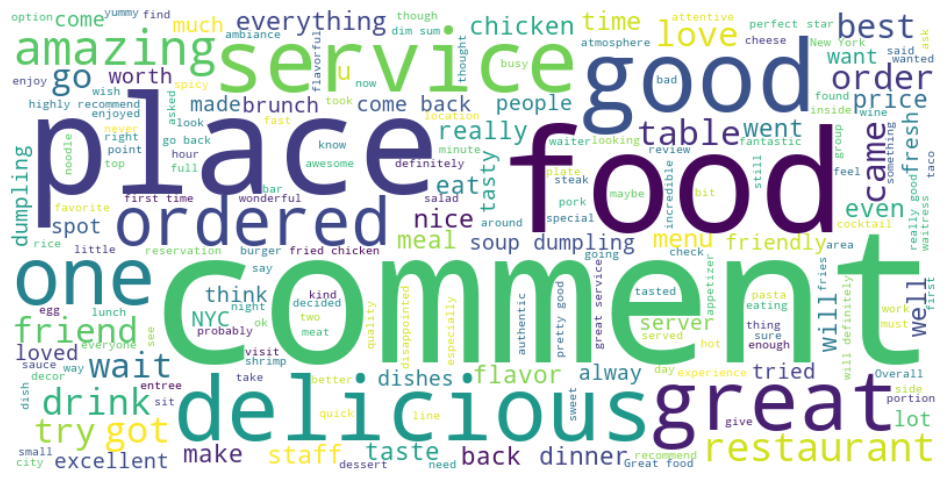

In [ ]:
# Creating a word cloud of the reviews

# concatenate all the comments into a single string

all_reviews = ' '.join(filttered_restaurant_reviews['comments'].values)

# create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_reviews)

# display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The common words have positive connotations like good, amazing, delicious, great.

<strong>Most popular cuisines</strong>

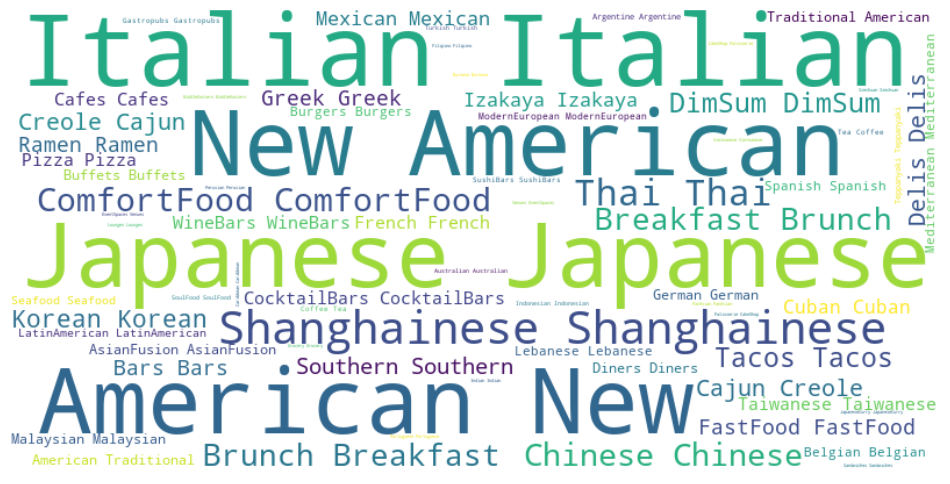

In [ ]:
# Convert the series into string text
text = ' '.join(filttered_restaurant_reviews['cuisine'].values)

# create a WordCloud object
wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
# display the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Italian, Japanese,mexican, american new, Korean are the most popular cuisine styles

<strong>Sentiment Analysis with Text Blob</strong><br>
TextBlob is a Python library with methods for calculating the subjectivity and polarity of text, such as tweets. Subjectivity measures how much of a personal opinion or judgment is expressed, while polarity measures the sentiment conveyed in the text, with values between -1 and 1 indicating negative, neutral, or positive sentiment. These values can be used to classify tweets as negative, positive, or neutral, with values above 0 being positive, below 0 being negative, and exactly 0 being neutral.

In [ ]:
#calculating subjectivity and polarity scores using TextBlob

filttered_restaurant_reviews['Subjectivity'] = filttered_restaurant_reviews['comments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
filttered_restaurant_reviews['Polarity'] = filttered_restaurant_reviews['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
filttered_restaurant_reviews['Review_sentiment'] = filttered_restaurant_reviews['Polarity'].apply(lambda x: 'positive' if x > 0 else (
                                'negative' if x < 0 else 'neutral'))

filttered_restaurant_reviews.head(3)

,restaurant_name,avg_rating,pricing,url,latitude,longitude,transactions,cuisine,restaurant_id,number_of_reviews,user_name,user_id,location,date_of_review,user_rating,comments,bogs,Subjectivity,Polarity,Review_sentiment
0,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Veronika N.,/user_details?userid=MSg_3-fj-ci1E13Kx8626Q,New York,3/3/2023,3.0,This small and crowded place seems to be a nei...,Italian This small and crowded place seems to ...,0.510455,0.118636,positive
1,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Shiraz D.,/user_details?userid=nnmfrjtA7k16dpn_WY1ceg,Tenafly,3/4/2023,5.0,Amazing pasta!! Literally cleaned our plates. ...,Italian Amazing pasta!! Literally cleaned our ...,0.700000,0.468750,positive
2,Da Andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.99597,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',,, ,...",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,Ke W.,/user_details?userid=CLCYWYIRJfYqwS8puiczFA,Monterey Park,2/18/2023,4.0,Great food! (I just type these words to reach ...,Italian Great food! (I just type these words t...,0.562500,0.604167,positive


positive    53160
neutral     45477
negative     4343
Name: Review_sentiment, dtype: int64


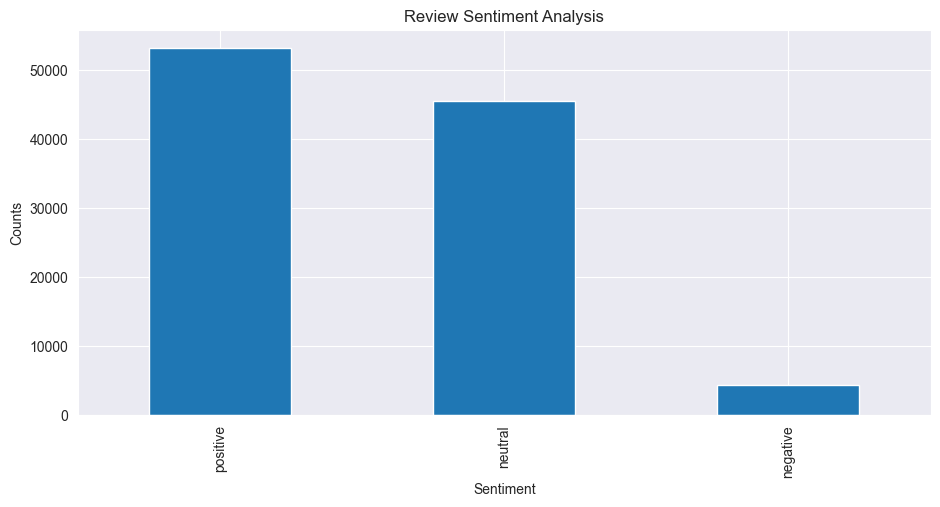

In [ ]:
# Show the value counts
print(filttered_restaurant_reviews['Review_sentiment'].value_counts())

# bar plot showing the sentiment categories
plt.subplots(figsize= (11, 5))
plt.title('Review Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.xticks(rotation=45)
filttered_restaurant_reviews['Review_sentiment'].value_counts().plot(kind='bar')
plt.show()

Customers tend to review restaurant when they have something positive to say.

<strong>Modeling</strong><br>

<strong>Baseline Models</strong><br>
<strong>Content-Based Filetering</strong><br>

We will use content-based filtering and suggest similar restaurants based on user explicit feedback.

First this system try to extract city, country and price class attributes of user feedback and if there are any, filter dataset by these features.

After extracting features of user's raw input, we process it using the same manner that we processed our text data in the last step.

Then we use our bags_of_words attribute that we described earlier and vectorize it using TF-IDF (Term Frequency-Inverse Document Frequency).

The next step is to calculate a similarity score. We will use Cosine Similarity to calculate similarities between user feedback vector and our filtered dataset vectors that are provided by TF-IDF.

ince we have used TF-IDF vectorizer, I will use linear_kernel instead of cosine_similarities since it's the same but faster.

After we calculate the similarities between user feedback and our data, we will add the similarities to our filtered data frame and sort it by similarities score, and then return them to the user as recommendations.

In [ ]:
def contentB_recommend(description):
    # Convert user input to lowercase
    description = description.lower()

    data = filttered_restaurant_reviews.copy()
    constituents_list = data['location']
    # Extract cities
    constituents_input = []
    for const in constituents_list:
        if const in description:
            constituents_input.append(const)
            description = description.replace(const, "")

    if constituents_input:
        data = data[data['location'].isin(constituents_input)]

    # Extract price class
    for key, value in price_map.items():
        if any(v in description for v in value):
            data = data[data['pricing'] == key]
            break
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Initialize a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bogs"])
    features = vec.transform(data["bogs"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = cos_sim[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)
    
    results = data[['restaurant_name', 'avg_rating', 'location', 'pricing', 'cuisine', 'transactions', 'comments', 'similarity']]

    return results.head()

In [ ]:
contentB_recommend('for chinese food')

Processed user feedback: chinese food


,restaurant_name,avg_rating,location,pricing,cuisine,transactions,comments,similarity
53807,Chef Huang Jian Bing & Peking Duck,4,Honolulu,low,Chinese,"[,',r,e,s,t,a,u,r,a,n,t,_,r,e,s,e,r,v,a,t,i,o,...",No comment,0.728609
45676,Vanessa's Dumpling House,4,Queens,popular-eats,Chinese,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",No comment,0.728609
45641,Vanessa's Dumpling House,4,Brooklyn,popular-eats,Chinese,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",No comment,0.728609
45642,Vanessa's Dumpling House,4,New York,popular-eats,Chinese,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",No comment,0.728609
45643,Vanessa's Dumpling House,4,New York,popular-eats,Chinese,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",No comment,0.728609


In [ ]:
# with price class and location
contentB_recommend('a reasonable breakfast')

Processed user feedback: reasonable breakfast


,restaurant_name,avg_rating,location,pricing,cuisine,transactions,comments,similarity
113363,ABC Kitchen,5,Manhattan,mid-range,Breakfast&Brunch,"[,',d,e,l,i,v,e,r,y,',]",salads and pizzas a must. reasonable wine lis...,0.329059
90079,Olmsted,1,Brooklyn,mid-range,American(New),"[,',p,i,c,k,u,p,',,, ,',d,e,l,i,v,e,r,y,',]","Cocktails, wine, food and service were all exc...",0.312441
91542,Fine & Rare,4,New York,mid-range,American(New),"[,',p,i,c,k,u,p,',,, ,',d,e,l,i,v,e,r,y,',]","Here for brunch. Great food, jazz, atmoshpere...",0.290026
30184,nonono,4,Milan,mid-range,Izakaya,"[,',p,i,c,k,u,p,',,, ,',d,e,l,i,v,e,r,y,',]",Great vibe and ramen! Staff is very friendly. ...,0.284084
73846,A Pasta Bar,5,Manhattan,mid-range,Italian,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]","Very good pasta, but the drinks are weak and o...",0.283949


In [ ]:
# with transaction and price class and location
contentB_recommend('burgers in Newyork')

Processed user feedback: burger newyork


,restaurant_name,avg_rating,location,pricing,cuisine,transactions,comments,similarity
104407,Boulton & Watt,5,Manhattan,low,American(New),"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]","great burger, also the veggie burger is amazin...",0.677884
74795,Cookshop,4,Beacon,low,American(New),"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",The lamb burger is super delicious- probably t...,0.591241
95974,P.J. Clarke's,3,New York,low,American(Traditional),"[,',p,i,c,k,u,p,',,, ,',d,e,l,i,v,e,r,y,',]","A delightful experience, a wonderful burger an...",0.567618
52834,Emily - West Village,5,Chicago,low,Pizza,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]","I only ate the burger, so these 5 stars are fo...",0.546381
99835,Kings of Kobe,4,Brooklyn,low,Burgers,"[,',d,e,l,i,v,e,r,y,',,, ,',p,i,c,k,u,p,',]",So I was looking for a nice burger joint. The...,0.532255


Export the content based recommender model

<strong>Hybrid Filtering with TensorFlow Recommenders (TFRS)</strong><br>
Is an open-source TensorFlow package that makes building, evaluating, and serving sophisticated recommender models easy.
It is designed to support various types of recommender models, including collaborative filtering, content-based filtering, and hybrid models that combine both approaches.

In [ ]:
filttered_restaurant_reviews.columns

Index(['restaurant_name', 'avg_rating', 'pricing', 'url', 'latitude',
       'longitude', 'transactions', 'cuisine', 'restaurant_id',
       'number_of_reviews', 'user_name', 'user_id', 'location',
       'date_of_review', 'user_rating', 'comments', 'bogs', 'Subjectivity',
       'Polarity', 'Review_sentiment'],
      dtype='object')

In [ ]:
#make a copy of the filttered_restaurant_reviews
tensorflow_data = filttered_restaurant_reviews.copy()
tensorflow_data = tf.data.Dataset.from_tensor_slices(dict(tensorflow_data))
tensorflow_data

<_TensorSliceDataset element_spec={'restaurant_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'avg_rating': TensorSpec(shape=(), dtype=tf.int64, name=None), 'pricing': TensorSpec(shape=(), dtype=tf.string, name=None), 'url': TensorSpec(shape=(), dtype=tf.string, name=None), 'latitude': TensorSpec(shape=(), dtype=tf.float64, name=None), 'longitude': TensorSpec(shape=(), dtype=tf.float64, name=None), 'transactions': TensorSpec(shape=(), dtype=tf.string, name=None), 'cuisine': TensorSpec(shape=(), dtype=tf.string, name=None), 'restaurant_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'number_of_reviews': TensorSpec(shape=(), dtype=tf.int64, name=None), 'user_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'user_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'location': TensorSpec(shape=(), dtype=tf.string, name=None), 'date_of_review': TensorSpec(shape=(), dtype=tf.string, name=None), 'user_rating': TensorSpec(shape=(), dtype=tf.float64, name=None), 'com

### Multi-task recommenders

In many applications there are multiple rich sources of feedback to draw upon. For example, an e-commerce site may record user visits to product pages (abundant, but relatively low signal), image clicks, adding to cart, and, finally, purchases. It may even record post-purchase signals such as reviews and returns.

Integrating all these different forms of feedback is critical to building systems that users love to use, and that do not optimize for any one metric at the expense of overall performance.

In addition, building a joint model for multiple tasks may produce better results than building a number of task-specific models. This is especially true where some data is abundant (for example, clicks), and some data is sparse (purchases, returns, manual reviews). In those scenarios, a joint model may be able to use representations learned from the abundant task to improve its predictions on the sparse task via a phenomenon known as transfer learning.

In our case we are going to build a multi-objective recommender for restaurants using both implicit(image clicks) and explicit signals(ratings)

In [ ]:
# Select the basic features.
ratings = tensorflow_data.map(lambda x: {
    "restaurant_name": x["restaurant_name"],
    "user_id": x["user_id"],
    "user_rating": x["user_rating"],
})
restaurants = tensorflow_data.map(lambda x: x["restaurant_name"])


In [ ]:
# Randomly shuffle data and split between train and test.
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

restaurant_names = restaurants.batch(1_000)
user_ids = ratings.batch(1_000_000).map(lambda x: x["user_id"])

unique_restaurant_names = np.unique(np.concatenate(list(restaurant_names)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

In [ ]:
class RestaurantModel(tfrs.models.Model):

      def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
        # We take the loss weights in the constructor: this allows us to instantiate
        # several model objects with different loss weights.

        super().__init__()

        embedding_dimension = 32

        # User and movie models.
        self.restaurant_model: tf.keras.layers.Layer = tf.keras.Sequential([
          tf.keras.layers.StringLookup(
            vocabulary=unique_restaurant_names, mask_token=None),
          tf.keras.layers.Embedding(len(unique_restaurant_names) + 1, embedding_dimension)
        ])
        self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
          tf.keras.layers.StringLookup(
            vocabulary=unique_user_ids, mask_token=None),
          tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
        ])

        # A small model to take in user and movie embeddings and predict ratings.
        # We can make this as complicated as we want as long as we output a scalar
        # as our prediction.
        self.rating_model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(1),
        ])

        # The tasks.
        self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()],
        )
        self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(
                candidates=restaurants.batch(128).map(self.restaurant_model)
            )
        )

        # The loss weights.
        self.rating_weight = rating_weight
        self.retrieval_weight = retrieval_weight

      def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
        # We pick out the user features and pass them into the user model.
        user_embeddings = self.user_model(features["user_id"])
        # And pick out the movie features and pass them into the movie model.
        restaurant_embeddings = self.restaurant_model(features["restaurant_name"])

        return (
            user_embeddings,
            restaurant_embeddings,
            # We apply the multi-layered rating model to a concatentation of
            # user and movie embeddings.
            self.rating_model(
                tf.concat([user_embeddings, restaurant_embeddings], axis=1)
            ),
        )
      def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

        ratings = features.pop("user_rating")

        user_embeddings, restaurant_embeddings, rating_predictions = self(features)

        # We compute the loss for each task.
        rating_loss = self.rating_task(
            labels=ratings,
            predictions=rating_predictions,
        )
        retrieval_loss = self.retrieval_task(user_embeddings, restaurant_embeddings)

        # And combine them using the loss weights.
        return (self.rating_weight * rating_loss
                + self.retrieval_weight * retrieval_loss)

### Rating-specialized model

Depending on the weights we assign, the model will encode a different balance of the tasks. Let's start with a model that only considers ratings.

In [ ]:
# model = RestaurantModel(rating_weight=1.0, retrieval_weight=0.0)
# model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

model = RestaurantModel(rating_weight=1.0, retrieval_weight=0.1)
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

In [ ]:
history = model.fit(train.batch(8192), epochs=10)

Epoch 1/10
10/10 [==============================] - 215s 21s/step - root_mean_squared_error: 2.4618 - factorized_top_k/top_1_categorical_accuracy: 0.0030 - factorized_top_k/top_5_categorical_accuracy: 0.0030 - factorized_top_k/top_10_categorical_accuracy: 0.0031 - factorized_top_k/top_50_categorical_accuracy: 0.0033 - factorized_top_k/top_100_categorical_accuracy: 0.0034 - loss: 7042.3091 - regularization_loss: 0.0000e+00 - total_loss: 7042.3091
Epoch 2/10
10/10 [==============================] - 238s 24s/step - root_mean_squared_error: 1.1531 - factorized_top_k/top_1_categorical_accuracy: 0.0013 - factorized_top_k/top_5_categorical_accuracy: 0.0013 - factorized_top_k/top_10_categorical_accuracy: 0.0013 - factorized_top_k/top_50_categorical_accuracy: 0.0013 - factorized_top_k/top_100_categorical_accuracy: 0.0013 - loss: 7035.8672 - regularization_loss: 0.0000e+00 - total_loss: 7035.8672    
Epoch 3/10
10/10 [==============================] - 235s 23s/step - root_mean_squared_error: 1.1

In [ ]:
metrics = model.evaluate(test.batch(8192), return_dict=True)
print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

5/5 [==============================] - 52s 10s/step - root_mean_squared_error: 1.2267 - factorized_top_k/top_1_categorical_accuracy: 0.0116 - factorized_top_k/top_5_categorical_accuracy: 0.0116 - factorized_top_k/top_10_categorical_accuracy: 0.0116 - factorized_top_k/top_50_categorical_accuracy: 0.0116 - factorized_top_k/top_100_categorical_accuracy: 0.0116 - loss: 3407.4364 - regularization_loss: 0.0000e+00 - total_loss: 3407.4364
Retrieval top-100 accuracy: 0.012.
Ranking RMSE: 1.227.


The model does well on predicting ratings (with an RMSE of around 1.11), but performs poorly at predicting which restaurants  will be viewed or not: its accuracy at 100 is almost 4 times worse than a model trained solely to predict restaurant visits

### Retrieval-specialized model

Let's now try a model that focuses on retrieval only.

In [ ]:
model = RestaurantModel(rating_weight=0.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [ ]:
history = model.fit(train.batch(8192), epochs=10)

Epoch 1/10
10/10 [==============================] - 273s 28s/step - root_mean_squared_error: 4.1221 - factorized_top_k/top_1_categorical_accuracy: 0.2198 - factorized_top_k/top_5_categorical_accuracy: 0.2198 - factorized_top_k/top_10_categorical_accuracy: 0.2199 - factorized_top_k/top_50_categorical_accuracy: 0.2254 - factorized_top_k/top_100_categorical_accuracy: 0.2362 - loss: 38896.2958 - regularization_loss: 0.0000e+00 - total_loss: 38896.2958
Epoch 2/10
10/10 [==============================] - 261s 25s/step - root_mean_squared_error: 4.1202 - factorized_top_k/top_1_categorical_accuracy: 0.2428 - factorized_top_k/top_5_categorical_accuracy: 0.2428 - factorized_top_k/top_10_categorical_accuracy: 0.2429 - factorized_top_k/top_50_categorical_accuracy: 0.2473 - factorized_top_k/top_100_categorical_accuracy: 0.2577 - loss: 38782.5380 - regularization_loss: 0.0000e+00 - total_loss: 38782.5380
Epoch 3/10
10/10 [==============================] - 260s 26s/step - root_mean_squared_error: 4.1

In [ ]:
metrics = model.evaluate(test.batch(8192), return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

3/3 [==============================] - 52s 16s/step - root_mean_squared_error: 4.1022 - factorized_top_k/top_1_categorical_accuracy: 0.0068 - factorized_top_k/top_5_categorical_accuracy: 0.0068 - factorized_top_k/top_10_categorical_accuracy: 0.0068 - factorized_top_k/top_50_categorical_accuracy: 0.0069 - factorized_top_k/top_100_categorical_accuracy: 0.0071 - loss: 60751.2852 - regularization_loss: 0.0000e+00 - total_loss: 60751.2852
Retrieval top-100 accuracy: 0.007.
Ranking RMSE: 4.102.


We get the opposite result: a model that does well on retrieval, but poorly on predicting ratings.

### Joint model

Let's now train a model that assigns positive weights to both tasks.

In [ ]:
model = RestaurantModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

In [ ]:
model.fit(train.batch(8192), epochs=10)


Epoch 1/10
10/10 [==============================] - 223s 22s/step - root_mean_squared_error: 2.8560 - factorized_top_k/top_1_categorical_accuracy: 0.0024 - factorized_top_k/top_5_categorical_accuracy: 0.0024 - factorized_top_k/top_10_categorical_accuracy: 0.0024 - factorized_top_k/top_50_categorical_accuracy: 0.0024 - factorized_top_k/top_100_categorical_accuracy: 0.0025 - loss: 70367.5270 - regularization_loss: 0.0000e+00 - total_loss: 70367.5270  
Epoch 2/10
10/10 [==============================] - 248s 25s/step - root_mean_squared_error: 1.1189 - factorized_top_k/top_1_categorical_accuracy: 0.0042 - factorized_top_k/top_5_categorical_accuracy: 0.0042 - factorized_top_k/top_10_categorical_accuracy: 0.0042 - factorized_top_k/top_50_categorical_accuracy: 0.0044 - factorized_top_k/top_100_categorical_accuracy: 0.0044 - loss: 68578.1953 - regularization_loss: 0.0000e+00 - total_loss: 68578.1953      
Epoch 3/10
10/10 [==============================] - 257s 25s/step - root_mean_squared_er

In [ ]:
metrics = model.evaluate(test.batch(8192), return_dict=True)

print(f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}.")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}.")

3/3 [==============================] - 50s 15s/step - root_mean_squared_error: 1.1128 - factorized_top_k/top_1_categorical_accuracy: 0.0066 - factorized_top_k/top_5_categorical_accuracy: 0.0066 - factorized_top_k/top_10_categorical_accuracy: 0.0066 - factorized_top_k/top_50_categorical_accuracy: 0.0067 - factorized_top_k/top_100_categorical_accuracy: 0.0072 - loss: 58503.1172 - regularization_loss: 0.0000e+00 - total_loss: 58503.1172
Retrieval top-100 accuracy: 0.007.
Ranking RMSE: 1.113.


The result is a model that performs roughly as well on both tasks as each specialized model.

### Making prediction

We can use the trained multitask model to get trained user and movie embeddings, as well as the predicted rating:

In [ ]:
trained_restaurant_embeddings, trained_user_embeddings, predicted_rating = model({
      "user_id": np.array(["42"]),
      "restaurant_name": np.array(["Da Andrea"])
  })
print("Predicted rating:")
print(predicted_rating)

Predicted rating:
tf.Tensor([[4.374741]], shape=(1, 1), dtype=float32)


While the results here do not show a clear accuracy benefit from a joint model in this case, multi-task learning is in general an extremely useful tool. We can expect better results when we can transfer knowledge from a data-abundant task (such as clicks) to a closely related data-sparse task (such as purchases).